# Linearni klasifikator



U ovom primeru pokazaćemo vam kako da implementirate jednostavan klasifikator podataka u dve klase.


In [91]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline


Neka su elementi dati u sledeće dve klase:

In [92]:
klasaA = [(3, 4), (1.5, 5), (6,8), (2.5, 5)]

klasaB = [(5, 2.5), (5,2), (8,3), (4.5, 3)]

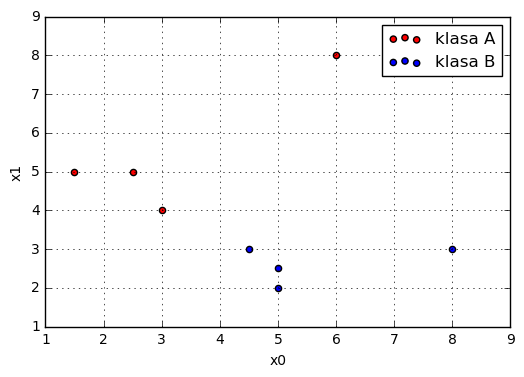

In [93]:
klasaA = np.array(klasaA)
klasaB = np.array(klasaB)

plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')
plt.grid(True)
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()

Elementima klase A pridruzicemo broj 1 a elementima klase B broj -1.

In [94]:
data = []
for el in klasaA:
    data.append([np.array([el[0], el[1], 1.]), 1.])

for el in klasaB:
    data.append([np.array([el[0], el[1], 1.]), -1.])
    
data = np.array(data)
print data

[[array([ 3.,  4.,  1.]) 1.0]
 [array([ 1.5,  5. ,  1. ]) 1.0]
 [array([ 6.,  8.,  1.]) 1.0]
 [array([ 2.5,  5. ,  1. ]) 1.0]
 [array([ 5. ,  2.5,  1. ]) -1.0]
 [array([ 5.,  2.,  1.]) -1.0]
 [array([ 8.,  3.,  1.]) -1.0]
 [array([ 4.5,  3. ,  1. ]) -1.0]]


Jednačina linearnog klasifikatora u 2D prostoru

$ w_0*x_0 + w_1*x_1+ w_2*1 < 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 = 0$

$ w_0*x_0 + w_1*x_1+ w_2*1 > 0$



In [95]:
w = np.array([1., -1., -1.])

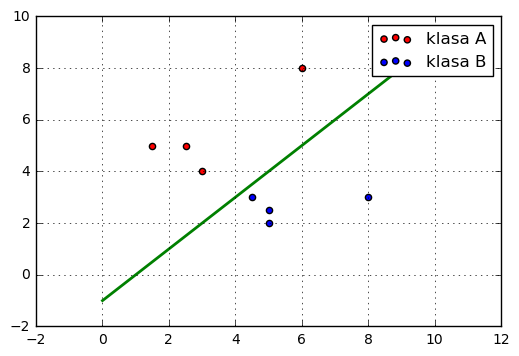

In [96]:
def nacrtaj_granicu(w, klasaA, klasaB):
    x_g = [0, 10] 
    y_g = [(-w[0]*x-w[2])/w[1] for x in x_g]

    plt.plot(x_g, y_g, 'g', lw=2)
    plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
    plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')

    plt.grid(True)
    plt.legend()
    
    
nacrtaj_granicu(np.array([1., -1., -1.]), klasaA, klasaB)    

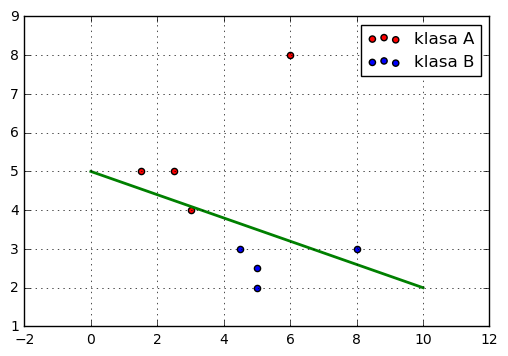

In [97]:

nacrtaj_granicu([0.3, 1., -5.], klasaA, klasaB)


In [98]:
def greske(w0, data):    
    max_it = 10
    for it in range(max_it):
        el = random.choice(data)
        rt = np.inner(w0, el[0])
        if(np.sign(el[1]) == np.sign(rt)):
            print 'OK', el[0]
        else:
            print 'ERR', el[0]

In [99]:
greske(np.array([0.3, 1., -5.]), data)

OK [ 5.   2.5  1. ]
OK [ 1.5  5.   1. ]
OK [ 5.  2.  1.]
OK [ 6.  8.  1.]
ERR [ 3.  4.  1.]
OK [ 2.5  5.   1. ]
OK [ 6.  8.  1.]
OK [ 1.5  5.   1. ]
ERR [ 3.  4.  1.]
OK [ 5.  2.  1.]


In [100]:
def linearna_klasifikacija(w0, data):    
    t = []
    ls = 0.05 # korak ucenja
    
    max_it = 100
    for it in range(max_it):
        err = 0 # broj pogresno klasifikovanih elemenata
        n = 50
        for i in range(n):
            el = random.choice(data)
            
            rt = np.inner(w0, el[0]) # odredi sa koje strane w0 se nalazi
            if(np.sign(el[1]) != np.sign(rt)): # ako nije sa dobre strane
                w0 -= ls*el[0] *np.sign(rt) 
                err += 1
        err = 100*err/n
        t.append([it, err])
        if(it%25==0):
            print it, err, w0
        if err==0:
            break
    
    return w0, np.array(t)

In [101]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data)
print w

0 10 [-0.05  1.3  -4.95]
[-0.05  1.3  -4.95]


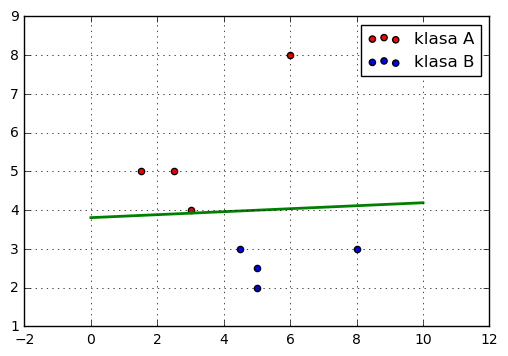

In [102]:
nacrtaj_granicu(w, klasaA, klasaB)

## Malo komplikovaniji primer

In [103]:


w = np.array([1., -1., -1.])


In [104]:
xl = 10*np.random.random(size=200)
xl = xl.reshape(100, 2)

x_list = np.array([(x[0], x[1], 1) for x in xl])


data = np.array([(x, np.inner(x, w)) for x in x_list])


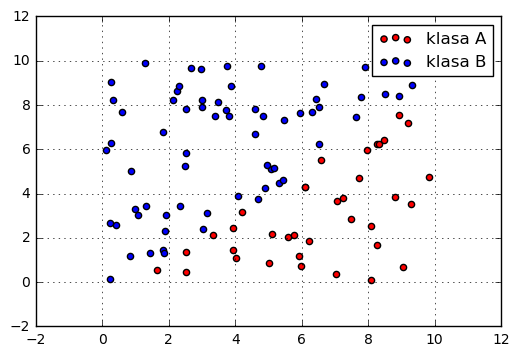

In [105]:
klasaA = np.array([(x[0], x[1], rr) for (x, rr) in data if rr>0])

klasaB = np.array([(x[0], x[1], rr) for (x, rr) in data if rr<0])
#print klasaB

plt.scatter(klasaA[:,0], klasaA[:,1], c='r', label='klasa A')
plt.scatter(klasaB[:,0], klasaB[:,1], c='b', label='klasa B')

plt.grid(True)
plt.legend()


In [106]:
w, t = linearna_klasifikacija(np.array([0.3, 1., -5.]), data)
print w

0 24 [ 0.91942356 -0.12244542 -4.9       ]
25 6 [ 2.95764464 -2.65593673 -3.35      ]
[ 2.95106677 -2.8028099  -3.3       ]


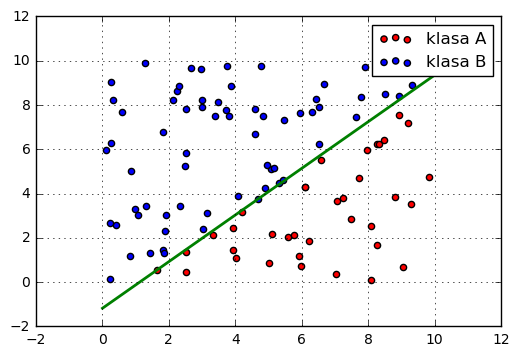

In [107]:
nacrtaj_granicu(w, klasaA, klasaB)

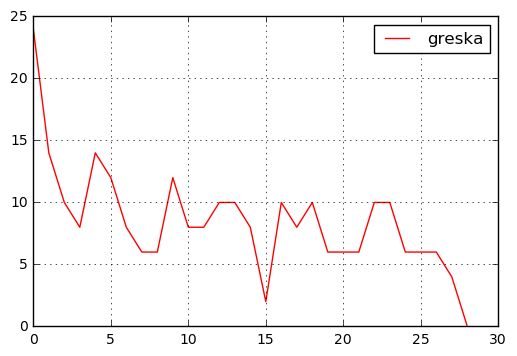

In [108]:
plt.plot(t[:,0], t[:,1], c='r', label='greska')

plt.grid(True)
plt.legend()
    